In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
demo_data = pd.read_csv('/workspaces/machine-learning-python-template-ds-2023/Ricardo/Regularized-Linear-Regression/demographic_health_data.csv')
demo_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [4]:
demo_data.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [5]:
demo_data.nunique()

fips                      3140
TOT_POP                   3074
0-9                       2723
0-9 y/o % of total pop    3136
19-Oct                    2743
                          ... 
CKD_prevalence              43
CKD_Lower 95% CI            39
CKD_Upper 95% CI            46
CKD_number                1894
Urban_rural_code             6
Length: 108, dtype: int64

In [8]:
data_types = demo_data.dtypes

missing_values = demo_data.isnull().sum()

data_types, missing_values[missing_values > 0]

(fips                        int64
 TOT_POP                     int64
 0-9                         int64
 0-9 y/o % of total pop    float64
 19-Oct                      int64
                            ...   
 CKD_prevalence            float64
 CKD_Lower 95% CI          float64
 CKD_Upper 95% CI          float64
 CKD_number                  int64
 Urban_rural_code            int64
 Length: 108, dtype: object,
 Series([], dtype: int64))

In [12]:
columns_to_drop = [col for col in demo_data.columns if '%' in col]
dropped_percent_demo_data = demo_data.drop(columns=columns_to_drop)

dropped_percent_demo_data.head()

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,...,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
0,1001,55601,6787,7637,6878,7089,7582,7738,5826,4050,...,15193,7.9,3345,8.6,3644,12.9,5462,3.1,1326,3
1,1003,218022,24757,26913,23579,25213,27338,29986,29932,20936,...,50761,7.8,13414,8.6,14692,12.0,20520,3.2,5479,4
2,1005,24881,2732,2960,3268,3201,3074,3278,3076,2244,...,8013,11.0,2159,12.1,2373,19.7,3870,4.5,887,6
3,1007,22400,2456,2596,3029,3113,3038,3115,2545,1723,...,6894,8.6,1533,10.0,1789,14.1,2511,3.3,595,2
4,1009,57840,7095,7570,6742,6884,7474,7844,6965,4931,...,15112,9.2,4101,10.5,4661,13.5,6017,3.4,1507,2


In [13]:
columns_to_drop2 = [col for  col in dropped_percent_demo_data.columns if 'prevalence' in col]
dropped_prevalence_demo_data = dropped_percent_demo_data.drop(columns=columns_to_drop2)

dropped_prevalence_demo_data.head()

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,...,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,Urban_rural_code
0,1001,55601,6787,7637,6878,7089,7582,7738,5826,4050,...,1,1,42438,20181,15193,3345,3644,5462,1326,3
1,1003,218022,24757,26913,23579,25213,27338,29986,29932,20936,...,1,3,170912,68790,50761,13414,14692,20520,5479,4
2,1005,24881,2732,2960,3268,3201,3074,3278,3076,2244,...,1,5,19689,11325,8013,2159,2373,3870,887,6
3,1007,22400,2456,2596,3029,3113,3038,3115,2545,1723,...,1,7,17813,9190,6894,1533,1789,2511,595,2
4,1009,57840,7095,7570,6742,6884,7474,7844,6965,4931,...,1,9,44448,20584,15112,4101,4661,6017,1507,2


In [14]:
for column in dropped_prevalence_demo_data.columns:
    print(column)

fips
TOT_POP
0-9
19-Oct
20-29
30-39
40-49
50-59
60-69
70-79
80+
White-alone pop
Black-alone pop
Native American/American Indian-alone pop
Asian-alone pop
Hawaiian/Pacific Islander-alone pop
Two or more races pop
POP_ESTIMATE_2018
N_POP_CHG_2018
GQ_ESTIMATES_2018
R_birth_2018
R_death_2018
R_NATURAL_INC_2018
R_INTERNATIONAL_MIG_2018
R_DOMESTIC_MIG_2018
R_NET_MIG_2018
Less than a high school diploma 2014-18
High school diploma only 2014-18
Some college or associate's degree 2014-18
Bachelor's degree or higher 2014-18
Percent of adults with less than a high school diploma 2014-18
Percent of adults with a high school diploma only 2014-18
Percent of adults completing some college or associate's degree 2014-18
Percent of adults with a bachelor's degree or higher 2014-18
POVALL_2018
PCTPOVALL_2018
PCTPOV017_2018
PCTPOV517_2018
MEDHHINC_2018
CI90LBINC_2018
CI90UBINC_2018
Civilian_labor_force_2018
Employed_2018
Unemployed_2018
Unemployment_rate_2018
Median_Household_Income_2018
Med_HH_Income_Per

In [15]:
final_demo_data = dropped_prevalence_demo_data.drop(columns=['Percent of Population Aged 60+', 'county_pop2018_18 and older'])

final_demo_data.head()

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,...,STATE_NAME,STATE_FIPS,CNTY_FIPS,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,Urban_rural_code
0,1001,55601,6787,7637,6878,7089,7582,7738,5826,4050,...,Alabama,1,1,20181,15193,3345,3644,5462,1326,3
1,1003,218022,24757,26913,23579,25213,27338,29986,29932,20936,...,Alabama,1,3,68790,50761,13414,14692,20520,5479,4
2,1005,24881,2732,2960,3268,3201,3074,3278,3076,2244,...,Alabama,1,5,11325,8013,2159,2373,3870,887,6
3,1007,22400,2456,2596,3029,3113,3038,3115,2545,1723,...,Alabama,1,7,9190,6894,1533,1789,2511,595,2
4,1009,57840,7095,7570,6742,6884,7474,7844,6965,4931,...,Alabama,1,9,20584,15112,4101,4661,6017,1507,2


In [17]:
cleaned_demo_data = final_demo_data.rename(columns={'19-Oct': '10-19'})

cleaned_demo_data.head()

,fips,TOT_POP,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,...,STATE_NAME,STATE_FIPS,CNTY_FIPS,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,Urban_rural_code
0,1001,55601,6787,7637,6878,7089,7582,7738,5826,4050,...,Alabama,1,1,20181,15193,3345,3644,5462,1326,3
1,1003,218022,24757,26913,23579,25213,27338,29986,29932,20936,...,Alabama,1,3,68790,50761,13414,14692,20520,5479,4
2,1005,24881,2732,2960,3268,3201,3074,3278,3076,2244,...,Alabama,1,5,11325,8013,2159,2373,3870,887,6
3,1007,22400,2456,2596,3029,3113,3038,3115,2545,1723,...,Alabama,1,7,9190,6894,1533,1789,2511,595,2
4,1009,57840,7095,7570,6742,6884,7474,7844,6965,4931,...,Alabama,1,9,20584,15112,4101,4661,6017,1507,2


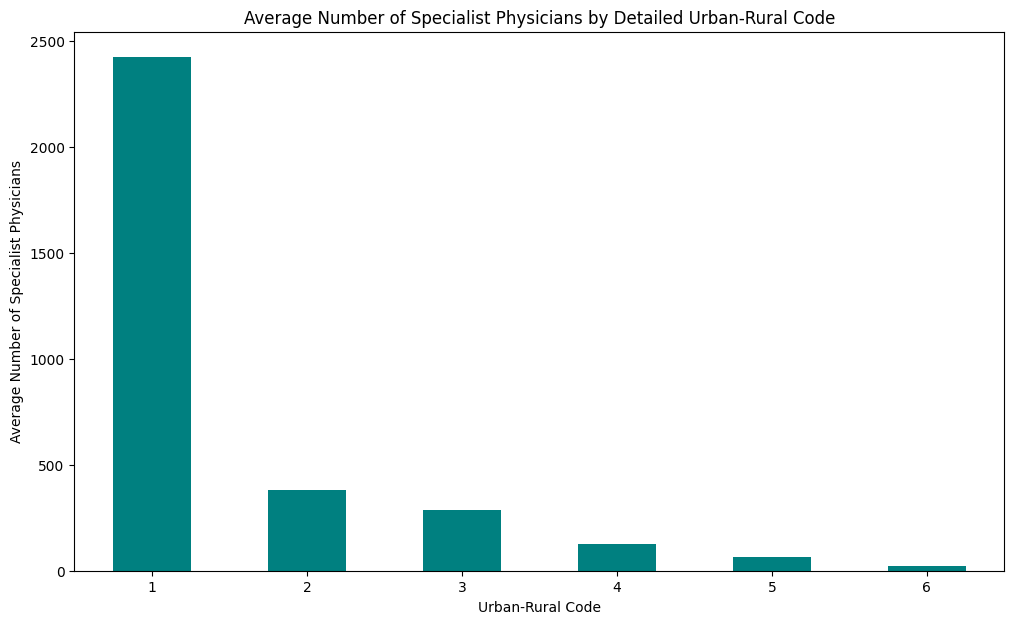

In [19]:
urban_rural_specialists = cleaned_demo_data.groupby('Urban_rural_code')['Total Specialist Physicians (2019)'].mean()

# Visualization
plt.figure(figsize=(12, 7))
urban_rural_specialists.plot(kind='bar', color='teal')
plt.title('Average Number of Specialist Physicians by Detailed Urban-Rural Code')
plt.xlabel('Urban-Rural Code')
plt.ylabel('Average Number of Specialist Physicians')
plt.xticks(rotation=0)
plt.show()





In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
predictor_variables = [
    'TOT_POP', '0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 
    'MEDHHINC_2018', 'PCTPOVALL_2018', 'Unemployment_rate_2018', 'Urban_rural_code',
    'Total Hospitals (2019)', 'ICU Beds_x', 'Obesity_number', 'Heart disease_number', 
    'COPD_number', 'diabetes_number', 'CKD_number'
]

x = cleaned_demo_data[predictor_variables].fillna(0)
y = cleaned_demo_data['Total Specialist Physicians (2019)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(x_train_scaled, y_train)

y_pred = ridge_model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 5452.621826625575
R2 Score: 0.9486073830658703


In [26]:
y_train_pred = ridge_model.predict(x_train_scaled)

# Calculating MSE and R² for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Mean Squared Error train:', mse_train)
print('R2 Score train:', r2_train)

Mean Squared Error train: 11462.15788588049
R2 Score train: 0.9664474953968565


In [28]:
from sklearn.model_selection import GridSearchCV

alpha_values = np.logspace(-4, 4, 50)

ridge = Ridge()
grid = GridSearchCV(estimator=ridge, param_grid=dict(alpha=alpha_values), scoring='neg_mean_squared_error', cv=5)
grid.fit(x_train_scaled, y_train)

best_alpha = grid.best_estimator_.alpha
best_mse = -grid.best_score_

best_alpha, best_mse


(0.0001, 16312.839190441795)

In [35]:
grid_r2 = GridSearchCV(estimator=ridge, param_grid=dict(alpha=alpha_values), scoring='r2', cv=5)
grid_r2.fit(x_train_scaled, y_train)

best_alpha_r2 = grid_r2.best_estimator_.alpha
best_r2 = grid_r2.best_score_

best_alpha_r2, best_r2


(0.2682695795279725, 0.9506766749463347)

In [36]:
ridge_model2 = Ridge(alpha=0.2682695795279725)
ridge_model2.fit(x_train_scaled, y_train)

y_pred2 = ridge_model2.predict(x_test_scaled)
mse_2 = mean_squared_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse_2)
print('R2 Score:', r2_2)

Mean Squared Error: 5452.621826625575
R2 Score: 0.9486073830658703


In [34]:
ridge_model3 = Ridge(alpha=0.0001)
ridge_model3.fit(x_train_scaled, y_train)

y_pred3 = ridge_model3.predict(x_test_scaled)
mse_3 = mean_squared_error(y_test, y_pred)
r2_3 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse_3)
print('R2 Score:', r2_3)

Mean Squared Error: 5452.621826625575
R2 Score: 0.9486073830658703


In [38]:
y_train_pred3 = ridge_model3.predict(x_train_scaled)
y_test_pred3 = ridge_model3.predict(x_test_scaled)


mse_train3 = mean_squared_error(y_train, y_train_pred3)
r2_train3 = r2_score(y_train, y_train_pred3)
mse_test3 = mean_squared_error(y_test, y_test_pred3)
r2_test3 = r2_score(y_test, y_test_pred3)

mse_train3, r2_train3, mse_test3, r2_test3
print('Mean Squared Error train 3:', mse_train3)
print('R2 Score train 3:', r2_train3)
print('Mean Squared Error test 3:', mse_test3)
print('R2 Score test 3:', r2_test3)

Mean Squared Error train 3: 11253.05618050628
R2 Score train 3: 0.9670595865931169
Mean Squared Error test 3: 6129.040434432576
R2 Score test 3: 0.9422319322270843
